In [27]:
# Data
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import lightgbm as lgb

sunshine = pd.read_csv("Dataset/sunshine.csv")
temp = pd.read_csv("Dataset/temp.csv")
wind = pd.read_csv("Dataset/wind.csv")

train_data = sunshine.merge(temp, on=['Day', 'Hour'], how='left')
train_data = train_data.merge(wind, on=['Day', 'Hour'], how='left')

sunshine1 = sunshine.iloc[0:150, :]
sunshine1['Day'] = sunshine1['Day'].map(lambda x: x + 300)

val_data = sunshine1.merge(temp, on=['Day', 'Hour'], how='left')
val_data = val_data.merge(wind, on=['Day', 'Hour'], how='left')

features = [f for f in train_data.columns if f not in ['Radiation', 'Day']]
X_train, X_test, Y_train, Y_test = train_test_split(train_data[features], train_data['Radiation'].values, test_size=0.1, random_state=42)

/tmp/ipykernel_26768/1486663907.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sunshine1['Day'] = sunshine1['Day'].map(lambda x: x + 300)


<AxesSubplot:xlabel='Day'>

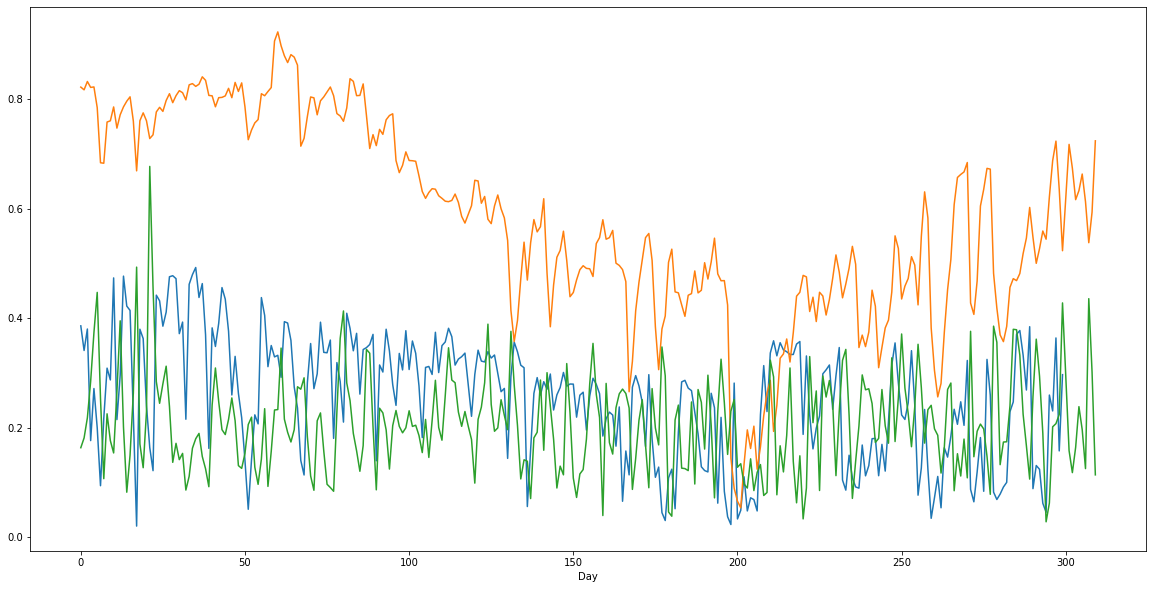

In [26]:
sunshine.groupby(['Day'])['Radiation'].mean().plot()
temp.groupby(['Day'])['Temp'].mean().plot(figsize=(20, 10))
wind.groupby(['Day'])['Spd'].mean().plot(figsize=(20, 10))
# wind.groupby(['Day'])['Dir'].mean().plot(figsize=(20, 10))

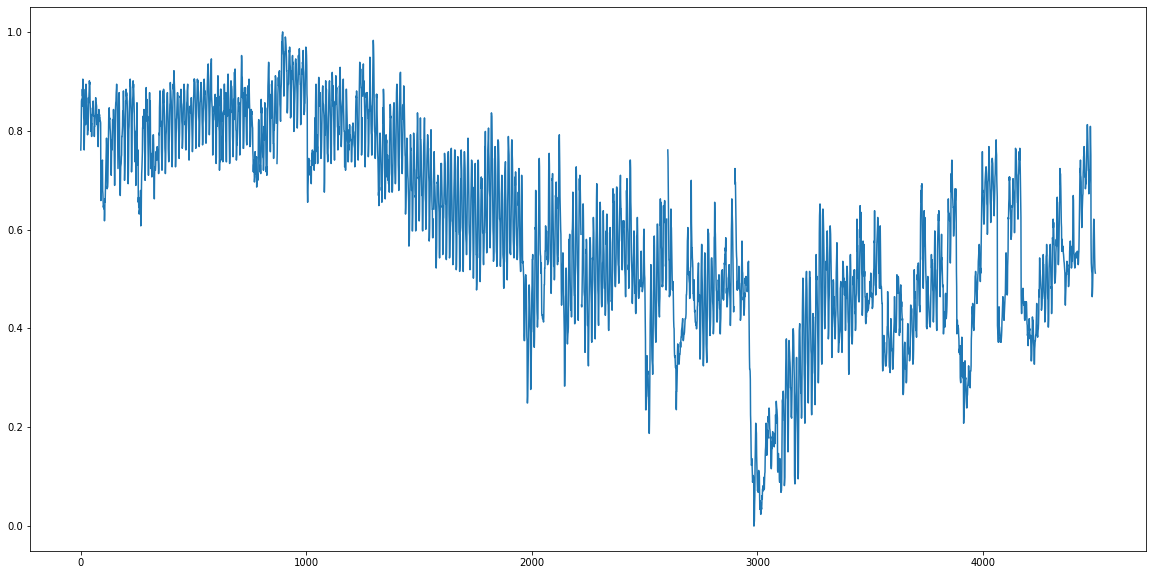

In [45]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))
# plt.plot(train_data['Radiation'][0:1000])
plt.plot(train_data['Temp'])
# plt.plot(train_data['Dir'][1:10000]/300)
# plt.plot(train_data['Spd'][1:10000])